## Libraries and variables

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data_path = '../01_Data/'
file_name_class = '3-2_psp-data_prepro_class.csv'
file_name_reg = '3-2_psp-data_prepro_regr.csv'
file_path_class = data_path + file_name_class
file_path_reg = data_path + file_name_reg

## Data load

In [90]:
df_class = pd.read_csv(file_path_class, index_col=0)
df_class['tmsp'] = pd.to_datetime(df_class['tmsp'])

df_regr = pd.read_csv(file_path_reg, index_col=0)

In [91]:
df_class

,tmsp,country,amount,success,PSP,3D_secured,card,fee,transaction_hour,purchase,...,card_Visa,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,country_Austria,country_Germany,country_Switzerland,amount_sc,transaction_hour_sc
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1.0,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.133013,0.0
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,3.0,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.133013,0.0
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1.0,0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.371795,0.0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,3.0,0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.371795,0.0
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0.5,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.189103,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50324,2019-02-28 23:45:39,Switzerland,415,0,UK_Card,0,Visa,1.0,23,27613,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.655449,1.0
50325,2019-02-28 23:46:48,Austria,91,0,UK_Card,0,Master,1.0,23,27614,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.136218,1.0
50326,2019-02-28 23:47:04,Austria,91,0,UK_Card,0,Master,1.0,23,27614,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.136218,1.0
50327,2019-02-28 23:47:36,Austria,91,0,UK_Card,0,Master,1.0,23,27614,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.136218,1.0


In [92]:
df_regr

,country,amount,amount_sc,3D_secured,card,country_Austria,country_Germany,country_Switzerland,card_Diners,card_Master,card_Visa,purchase,PSP,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,fee,success_max,transaction_count
0,Austria,6,0.000000,0,Diners,1.0,0.0,0.0,1.0,0.0,0.0,4591,Moneycard,0.0,1.0,0.0,0.0,2.0,0,1
1,Austria,6,0.000000,0,Diners,1.0,0.0,0.0,1.0,0.0,0.0,4591,Simplecard,0.0,0.0,1.0,0.0,0.5,0,1
2,Austria,6,0.000000,0,Diners,1.0,0.0,0.0,1.0,0.0,0.0,18124,Simplecard,0.0,0.0,1.0,0.0,0.5,0,1
3,Austria,6,0.000000,0,Diners,1.0,0.0,0.0,1.0,0.0,0.0,18124,UK_Card,0.0,0.0,0.0,1.0,2.0,0,2
4,Austria,6,0.000000,0,Master,1.0,0.0,0.0,0.0,1.0,0.0,12408,Simplecard,0.0,0.0,1.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38217,Switzerland,495,0.783654,1,Master,0.0,0.0,1.0,0.0,1.0,0.0,10027,Simplecard,0.0,0.0,1.0,0.0,0.5,0,1
38218,Switzerland,497,0.786859,1,Master,0.0,0.0,1.0,0.0,1.0,0.0,6249,Moneycard,0.0,1.0,0.0,0.0,5.0,1,1
38219,Switzerland,497,0.786859,1,Master,0.0,0.0,1.0,0.0,1.0,0.0,6249,UK_Card,0.0,0.0,0.0,1.0,1.0,0,1
38220,Switzerland,499,0.790064,0,Master,0.0,0.0,1.0,0.0,1.0,0.0,1158,Simplecard,0.0,0.0,1.0,0.0,0.5,0,1


## EDA

### Descriptive statistics

In [93]:
df_class[['amount', 'fee', 'transaction_hour', ]].describe()

,amount,fee,transaction_hour
count,50329.000000,50329.000000,50329.000000
mean,202.379622,1.757704,11.497606
std,96.255629,1.815226,6.920892
min,6.000000,0.500000,0.000000
25%,133.000000,1.000000,5.000000
50%,201.000000,1.000000,12.000000
75%,269.000000,2.000000,17.000000
max,630.000000,10.000000,23.000000


### Correlation analysis

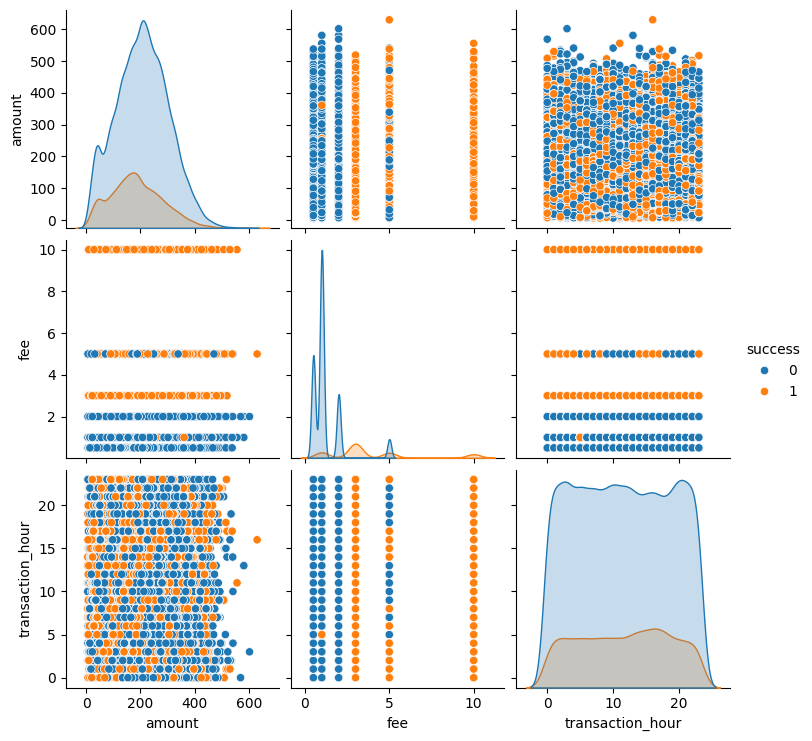

In [94]:
# Create pairplot
sns.pairplot(df_class[['amount', 'fee', 'transaction_hour', 'success']], hue='success')
plt.show()

In [95]:
# Function for creating a correlation matrix
def print_correlation_matrix(corr_method:str, title:str):
    corr_matrix = df_class.select_dtypes(include=['int64', 'float64']).corr(method=corr_method)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title(title)
    plt.show()

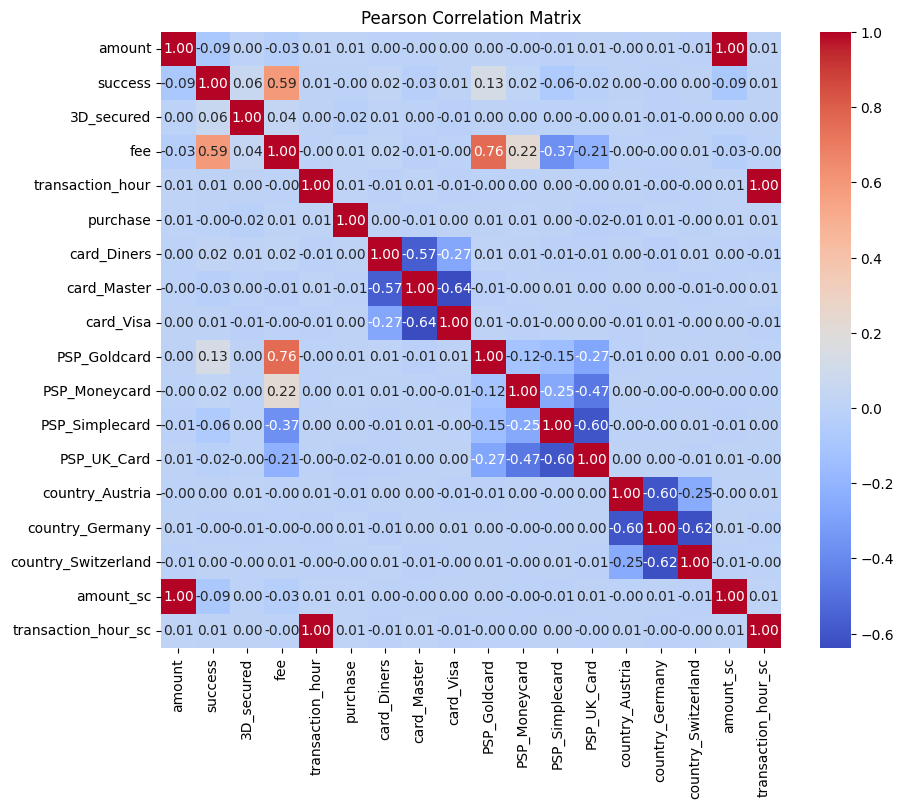

In [96]:
print_correlation_matrix('pearson', 'Pearson Correlation Matrix')

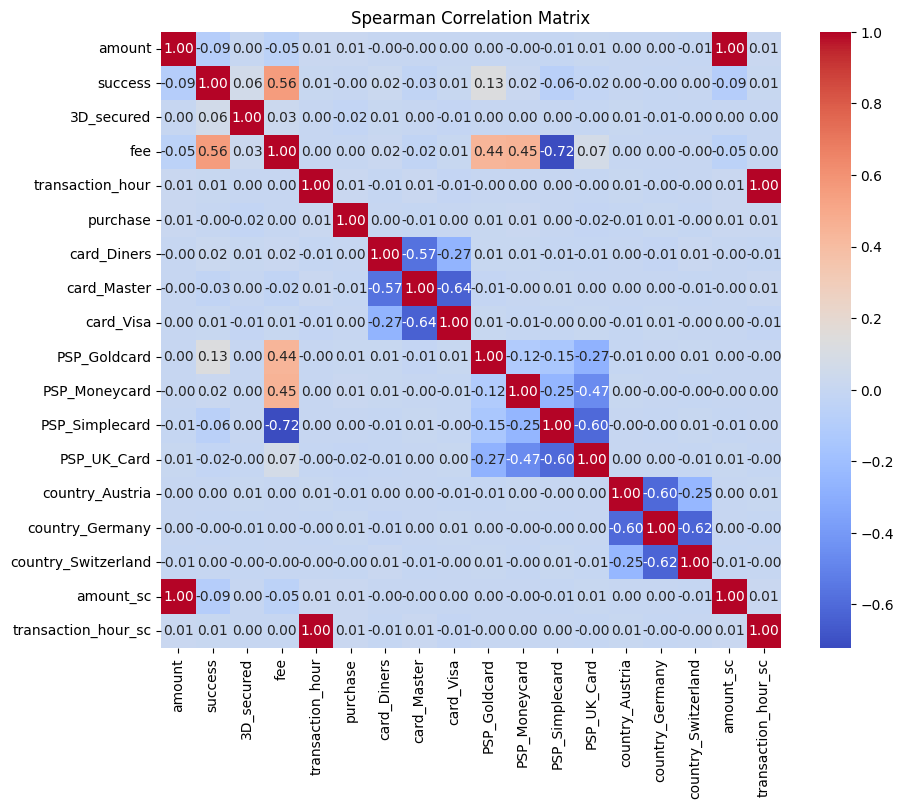

In [97]:
print_correlation_matrix('spearman', 'Spearman Correlation Matrix')

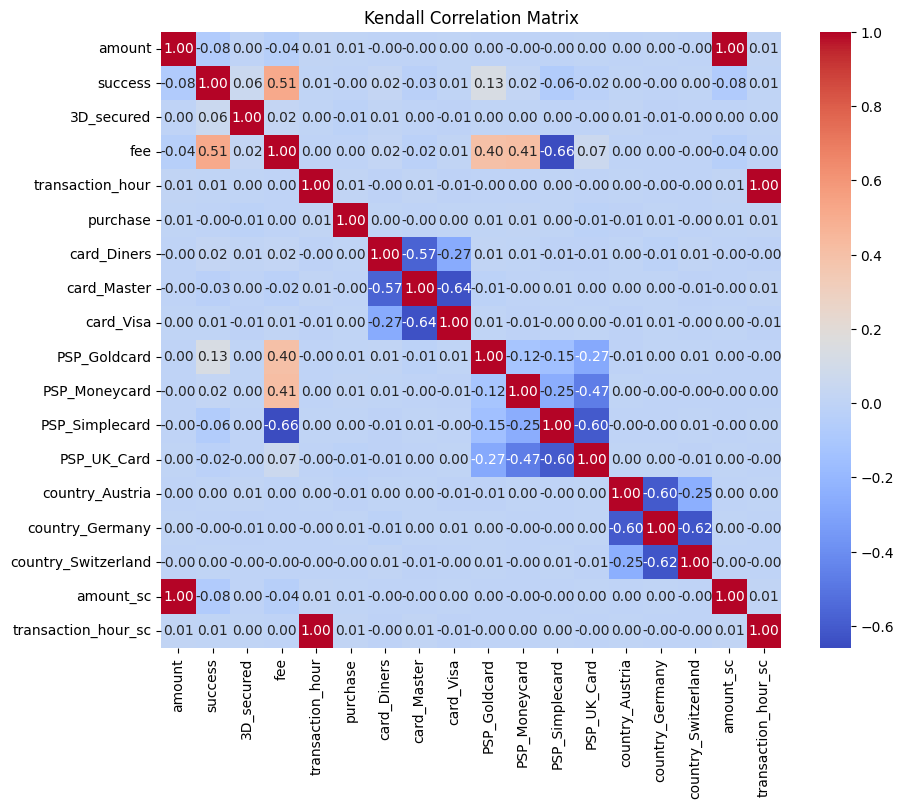

In [98]:
print_correlation_matrix('kendall', 'Kendall Correlation Matrix')

### Distribution of "success"

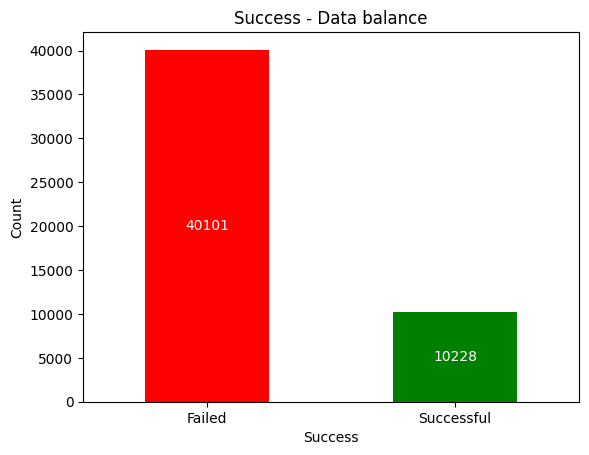

In [99]:
success_counts = df_class['success'].value_counts()

success_counts.plot(kind='bar', color=['red', 'green'])

for i in range(len(success_counts)):
    plt.text(i, success_counts[i] / 2, str(success_counts[i]), ha='center', va='center', color='white')

plt.title('Success - Data balance')
plt.xlabel('Success')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Failed', 'Successful'], rotation=0)
plt.show()

In [100]:
def plot_success_distribution(column:str, xlabel:str, stacked=False):
    transaction_counts = df_class.groupby([column, 'success']).size().unstack(fill_value=0)

    ax = transaction_counts.plot(kind='bar', stacked=stacked)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.title('Transactions per ' + xlabel + ' by Success')
    plt.xlabel(xlabel)
    plt.ylabel('Transactions')
    plt.xticks(rotation=45)
    plt.legend(title='Success', labels=['Failed', 'Successful'])

    plt.show()

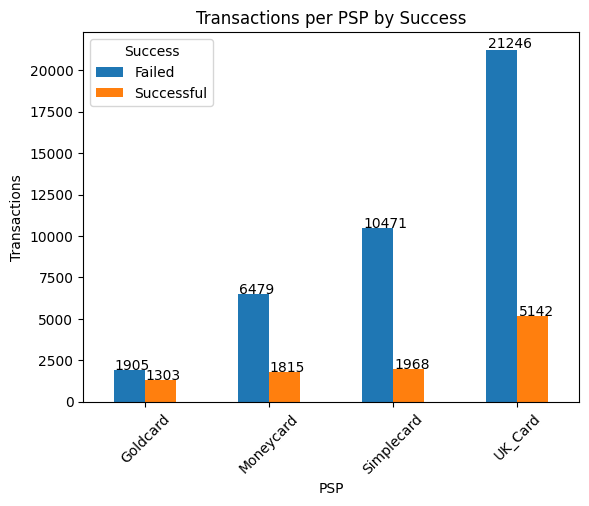

In [101]:
plot_success_distribution('PSP', 'PSP')

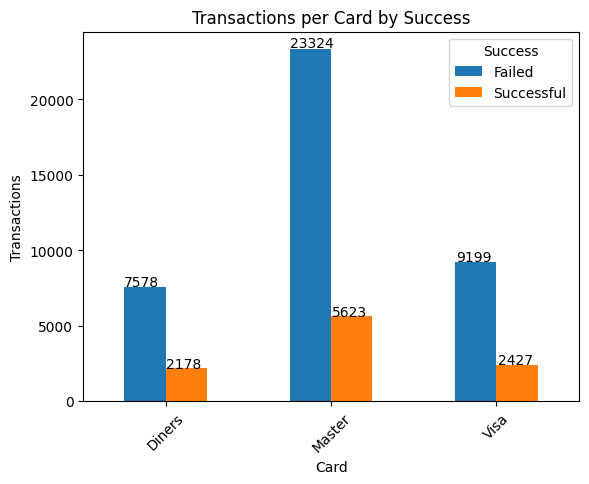

In [102]:
plot_success_distribution('card', 'Card')

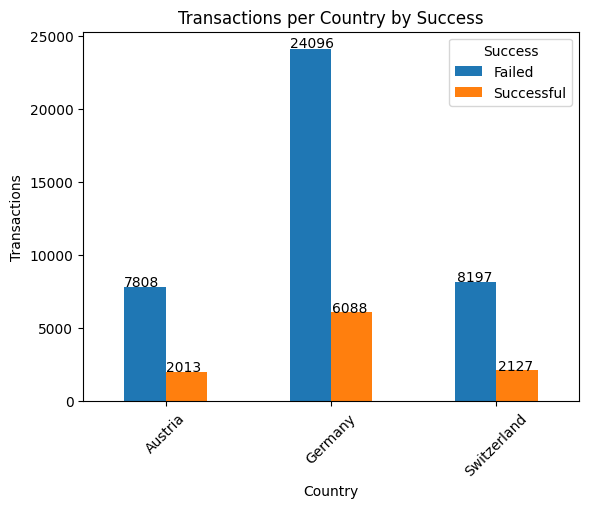

In [103]:
plot_success_distribution('country', 'Country')

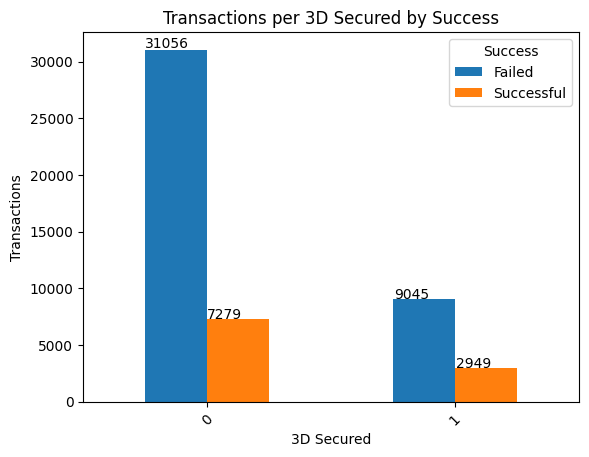

In [104]:
plot_success_distribution('3D_secured', '3D Secured')

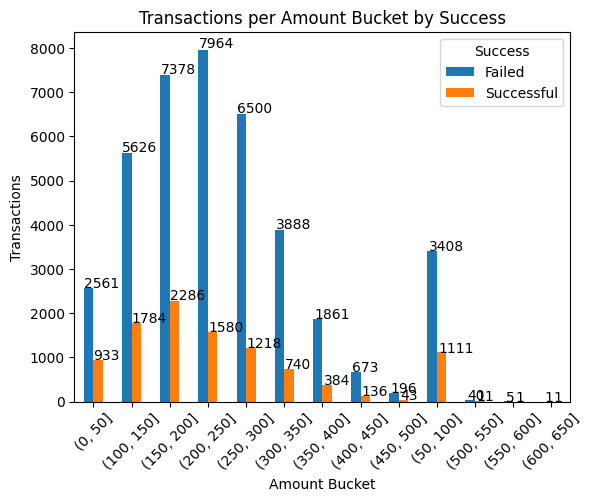

In [105]:
plot_success_distribution('amount_bucket', 'Amount Bucket')

### Distribution of success rates

In [106]:
def plot_success_rate_distribution(column:str, xlabel:str, type='bar'):
    success_rate = df_class.groupby(column)['success'].mean()

    ax = success_rate.plot(kind=type, figsize=(10,5))

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')

    plt.title('Success Rate by ' + xlabel)
    plt.xlabel(xlabel)
    plt.ylim(0, 1)
    plt.ylabel('Success Rate')
    plt.xticks(rotation=45)

    plt.show()

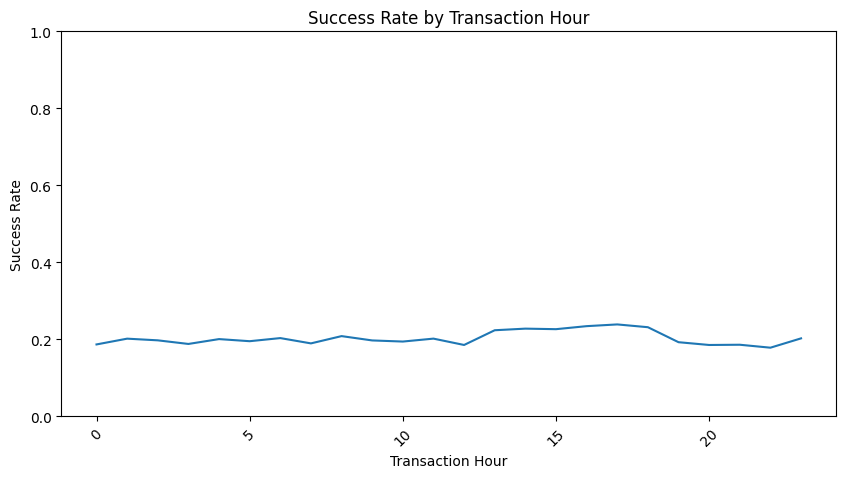

In [107]:
plot_success_rate_distribution('transaction_hour', 'Transaction Hour', type='line')

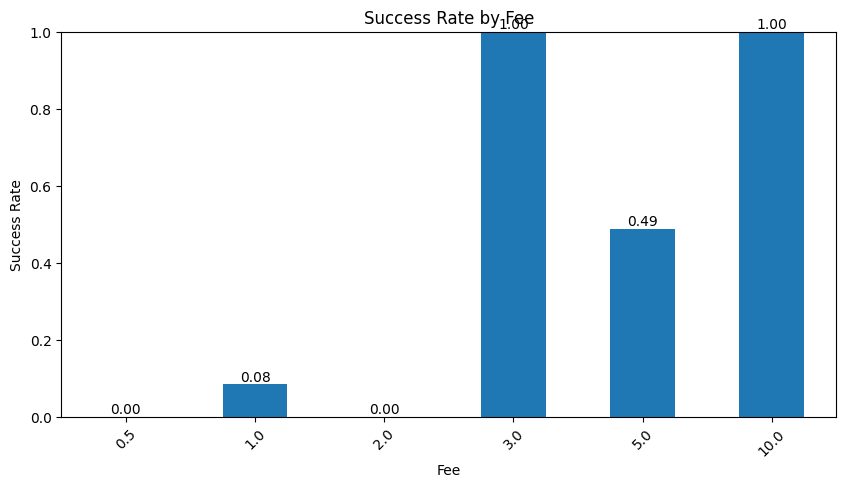

In [108]:
plot_success_rate_distribution('fee', 'Fee')

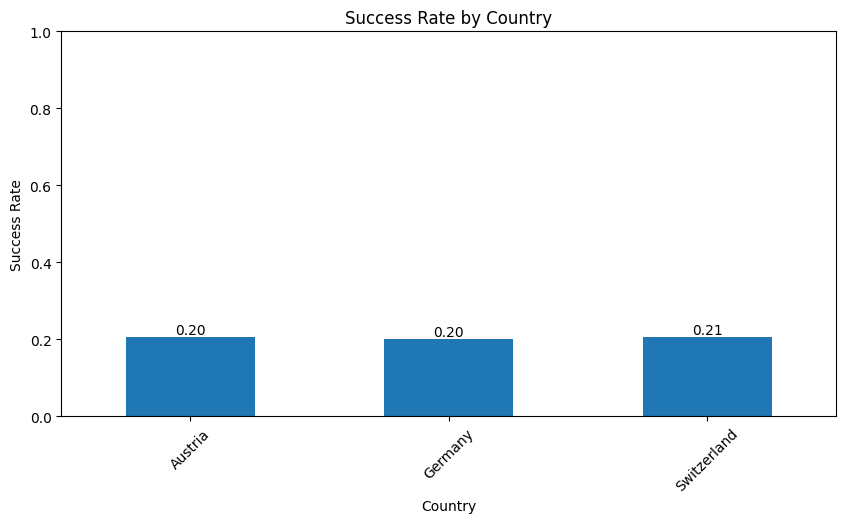

In [109]:
plot_success_rate_distribution('country', 'Country')

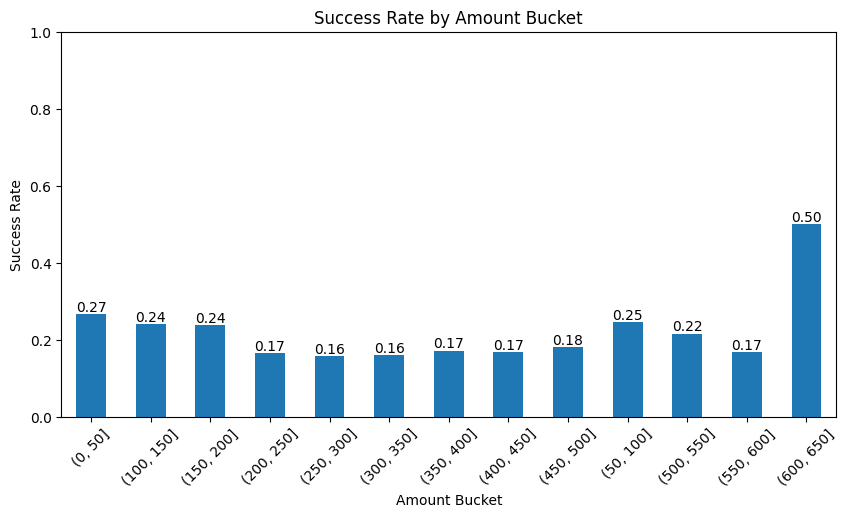

In [110]:
plot_success_rate_distribution('amount_bucket', 'Amount Bucket')

### Distribution of combined success rates

In [111]:
def plot_combined_success_rate_distribution(column:str, xlabel:str, type='bar', size=(6.4,4.8)):
    success_rate = df_class.groupby([column, 'PSP'])['success'].mean().unstack()

    ax = success_rate.plot(kind=type, figsize=size)
    
    # Add label above bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')

    ax.set_xticks(range(len(success_rate.index)))
    ax.set_xticklabels(success_rate.index, rotation=45)    

    plt.title('Success Rate per ' + xlabel + ' and PSP')
    plt.xlabel(xlabel)
    plt.ylabel('Success Rate')
    plt.ylim(0, 1)
    plt.legend(title='PSP')

    plt.show()

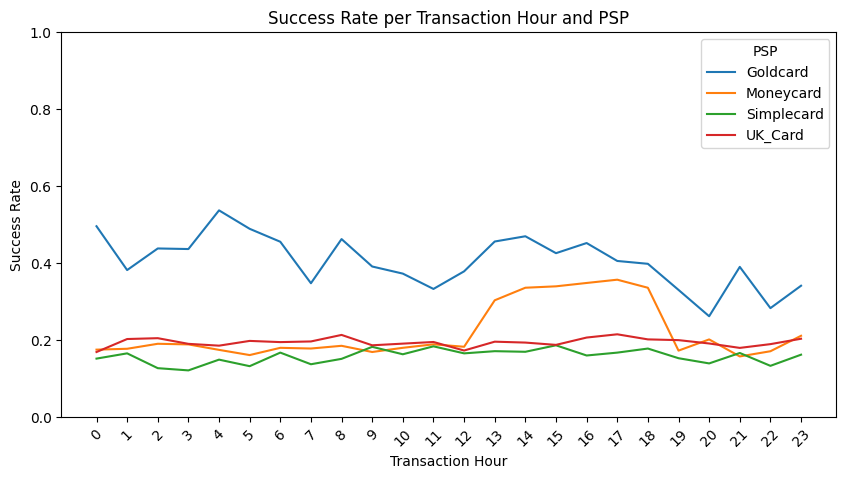

In [112]:
plot_combined_success_rate_distribution('transaction_hour', 'Transaction Hour', type="line", size=(10,5))

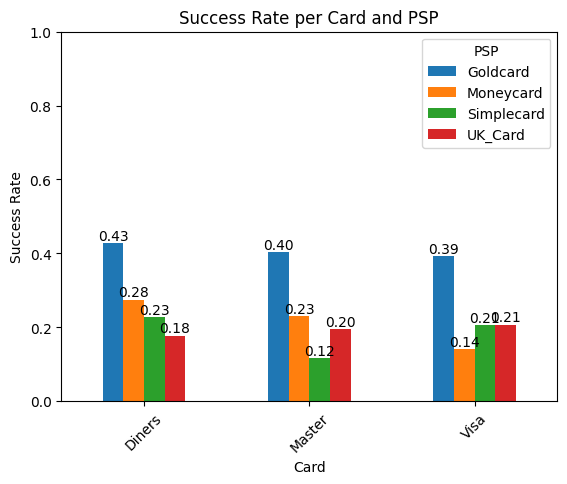

In [113]:
plot_combined_success_rate_distribution('card', 'Card')

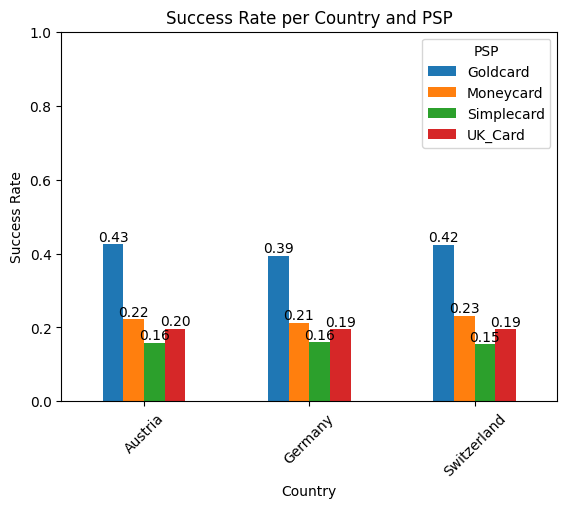

In [114]:
plot_combined_success_rate_distribution('country', 'Country')

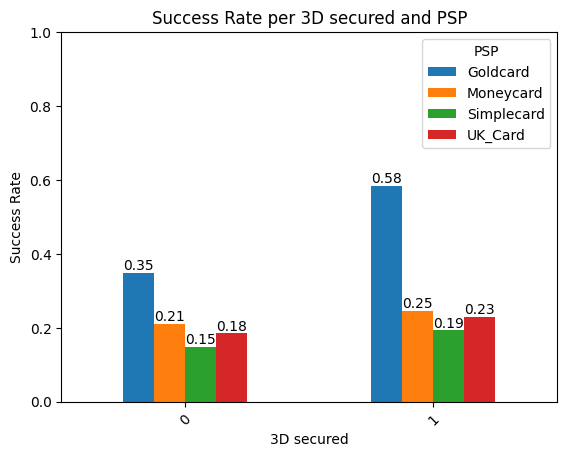

In [115]:
plot_combined_success_rate_distribution('3D_secured', '3D secured')

### Distribution of Amount

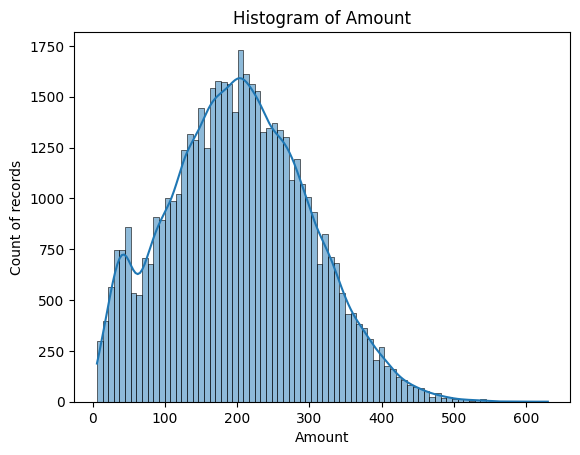

In [116]:
# Histogram of amount
sns.histplot(df_class['amount'], bins=80, kde=True)

plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Count of records')

plt.show()

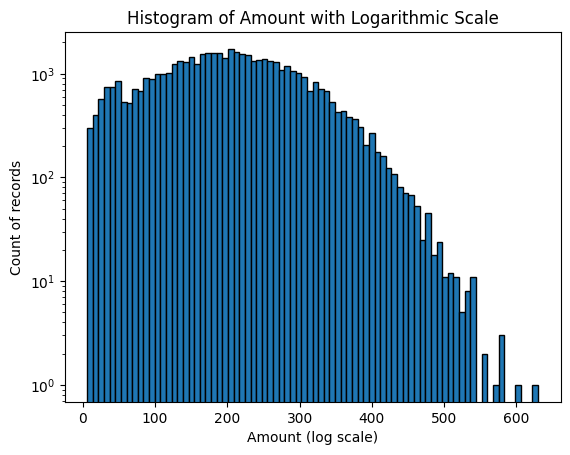

In [117]:
# Histogram (logarithmic) for amount
plt.hist(df_class['amount'], bins=80, edgecolor='black')
plt.yscale('log')
plt.title('Histogram of Amount with Logarithmic Scale')
plt.xlabel('Amount (log scale)')
plt.ylabel('Count of records')

plt.show()

## EDA for transactions grouped by purchase

### Correlation analysis

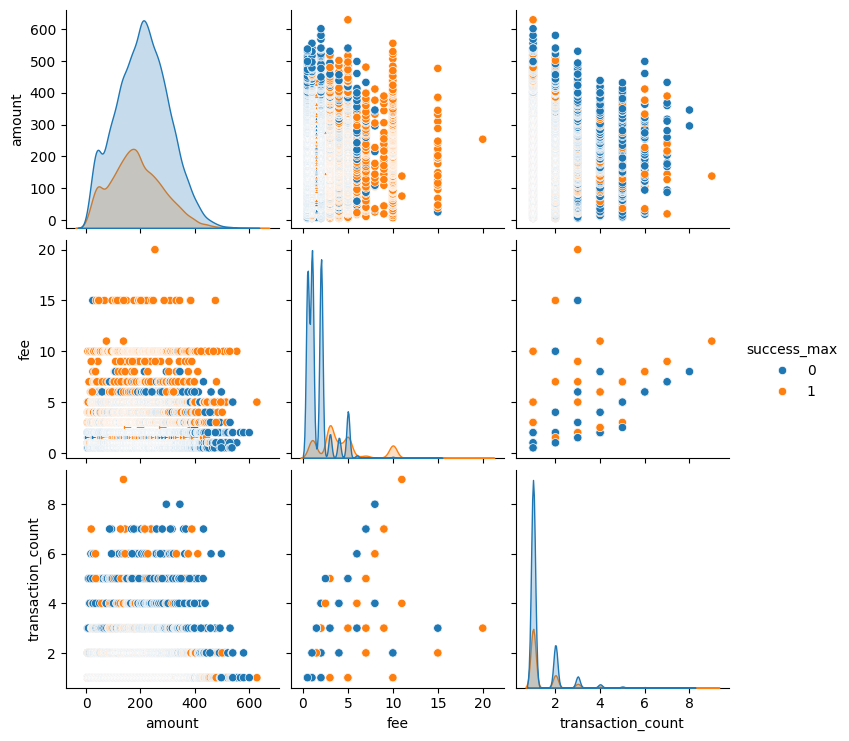

In [118]:
# Create pairplot
sns.pairplot(df_regr[['amount', 'fee', 'transaction_count', 'success_max']], hue='success_max')
plt.show()

In [119]:
# Function for creating a correlation matrix
def print_correlation_matrix_purchase(corr_method:str, title:str):
    corr_matrix = df_regr.select_dtypes(include=['int64', 'float64']).corr(method=corr_method)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title(title)
    plt.show()

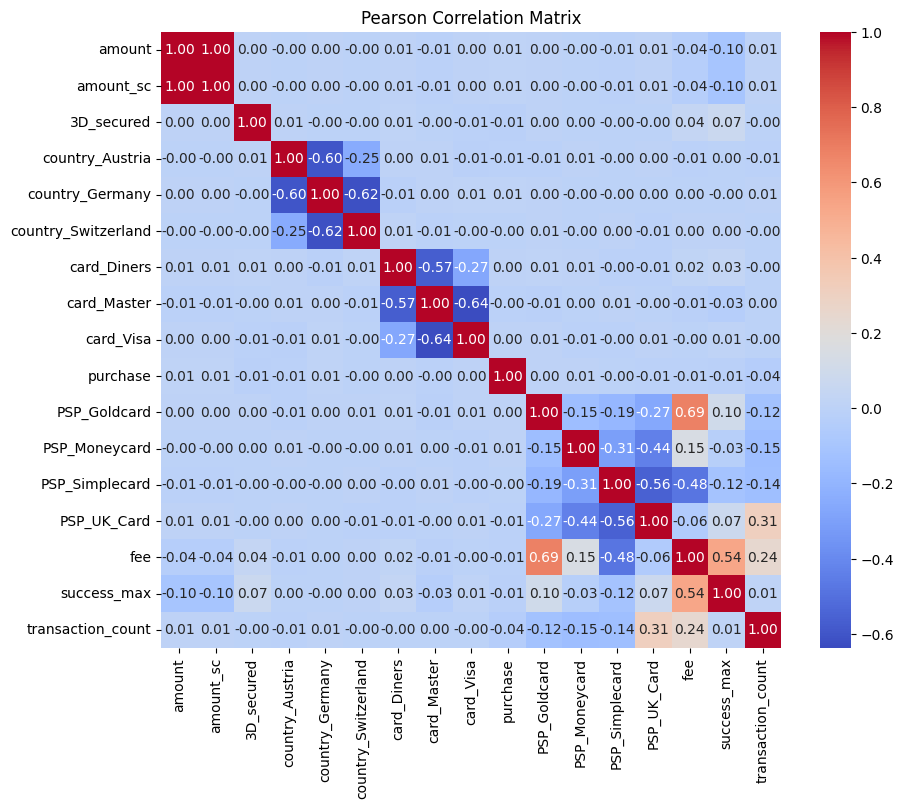

In [120]:
print_correlation_matrix_purchase('pearson', 'Pearson Correlation Matrix')

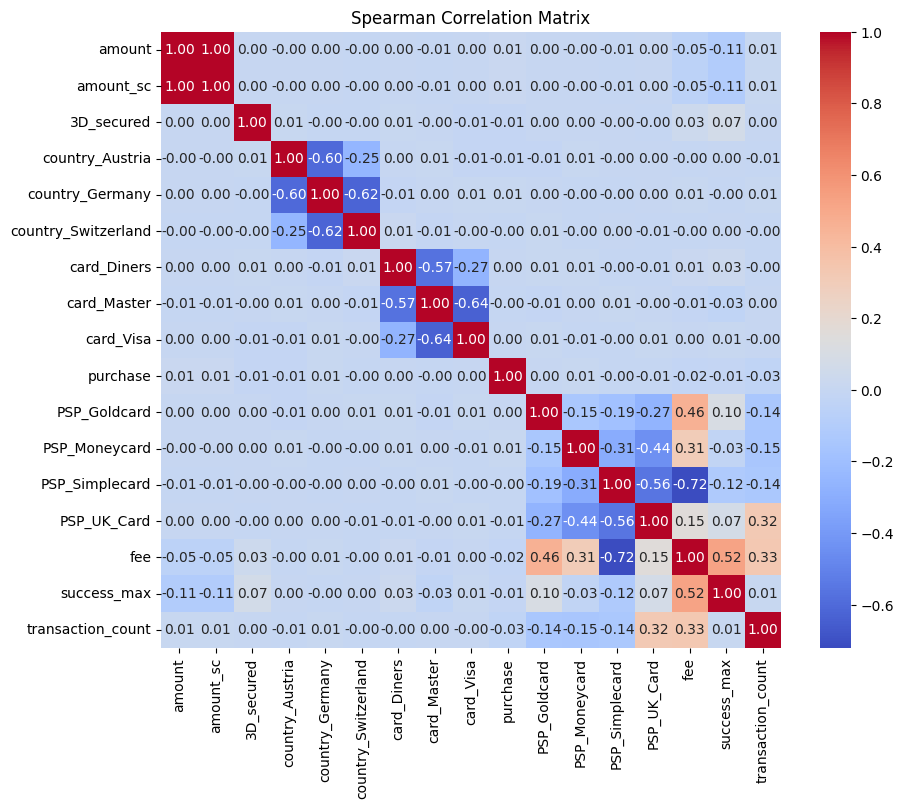

In [121]:
print_correlation_matrix_purchase('spearman', 'Spearman Correlation Matrix')

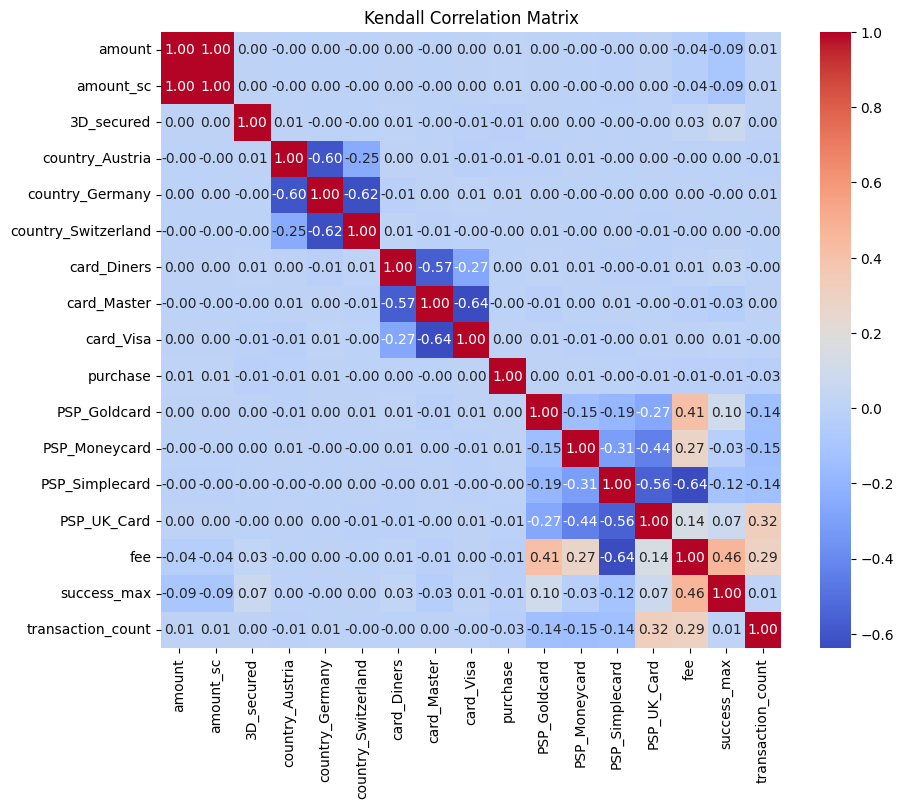

In [122]:
print_correlation_matrix_purchase('kendall', 'Kendall Correlation Matrix')

### Transactions per purchase

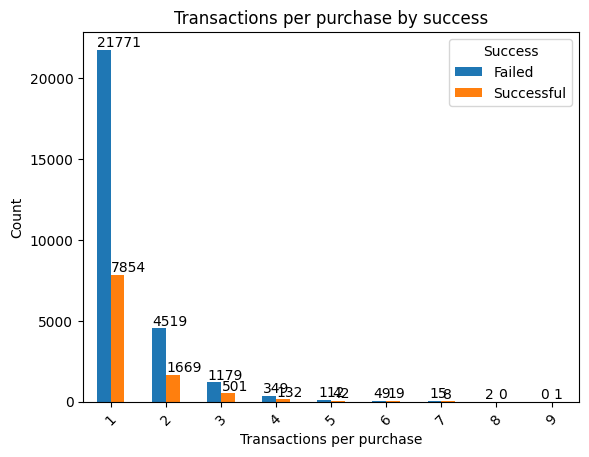

In [123]:
# Transactions per purchase
transaction_counts = df_regr.groupby(['transaction_count', 'success_max']).size().unstack(fill_value=0)

ax = transaction_counts.plot(kind='bar', stacked=False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() +200))

plt.title('Transactions per purchase by success')
plt.xlabel('Transactions per purchase')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Success', labels=['Failed', 'Successful'])

plt.show()

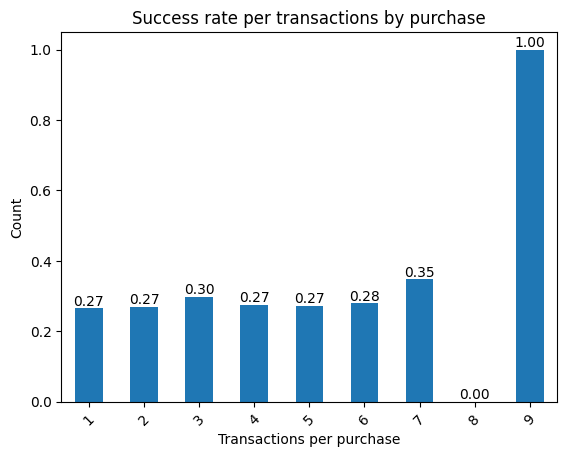

In [124]:
# Success rate per transactions by purchase
transaction_counts = df_regr.groupby('transaction_count')['success_max'].mean()

ax = transaction_counts.plot(kind='bar', stacked=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Success rate per transactions by purchase')
plt.xlabel('Transactions per purchase')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

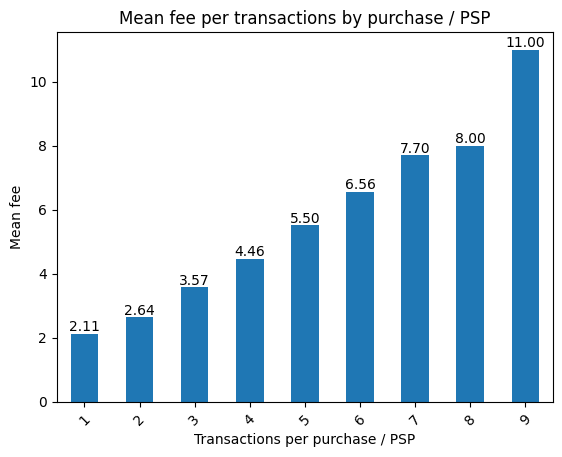

In [125]:
# Mean fee per transactions by purchase and PSP
transaction_counts = df_regr.groupby('transaction_count')['fee'].mean()

ax = transaction_counts.plot(kind='bar', stacked=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Mean fee per transactions by purchase / PSP')
plt.xlabel('Transactions per purchase / PSP')
plt.ylabel('Mean fee')
plt.xticks(rotation=45)

plt.show()

In [126]:
def plot_combined_mean_fee_distribution(column:str, xlabel:str):
    transfee_mean = df_regr.groupby(['transaction_count',column])['fee'].mean().unstack() 

    transfee_mean.plot(kind='bar', stacked=False)

    plt.title('Mean fee by transaction count')
    plt.xlabel(xlabel)
    plt.ylabel('Mean fee')
    plt.xticks(rotation=45)

    plt.show()

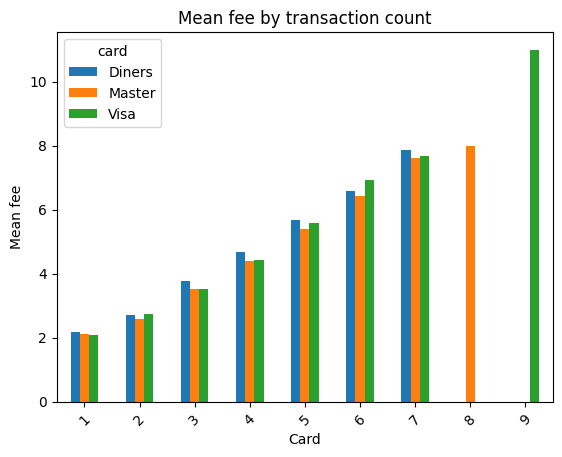

In [127]:
plot_combined_mean_fee_distribution('card', 'Card')

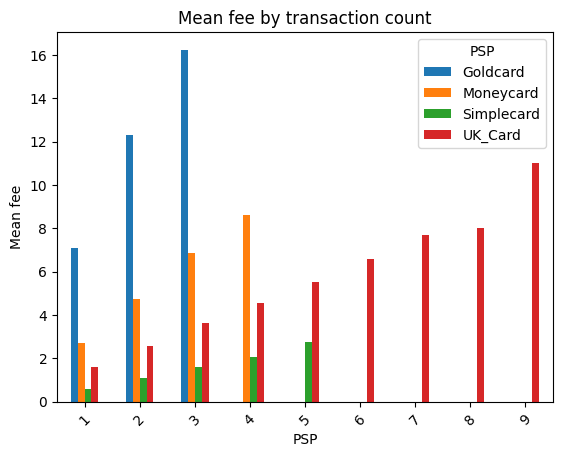

In [128]:
plot_combined_mean_fee_distribution('PSP', 'PSP')

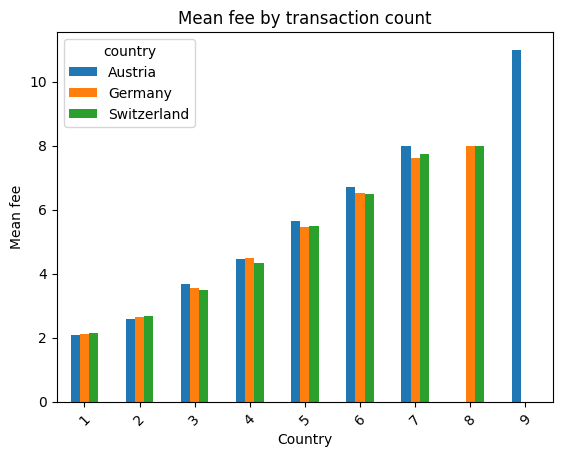

In [129]:
plot_combined_mean_fee_distribution('country', 'Country')

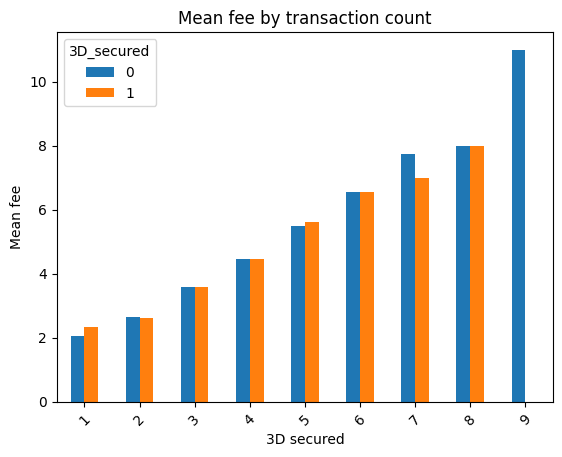

In [130]:
plot_combined_mean_fee_distribution('3D_secured', '3D secured')

In [131]:
def plot_combined_success_rate_distribution_reg(column:str, xlabel:str, type='bar', size=(6.4,4.8)):
    success_rate = df_regr.groupby([column, 'PSP'])['success_max'].mean().unstack()

    ax = success_rate.plot(kind=type, figsize=size)
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')

    ax.set_xticks(range(len(success_rate.index)))
    ax.set_xticklabels(success_rate.index, rotation=45)    

    plt.title('Success Rate per ' + xlabel + ' and PSP')
    plt.xlabel(xlabel)
    plt.ylabel('Success Rate')
    plt.ylim(0, 1)
    plt.legend(title='PSP')

    plt.show()

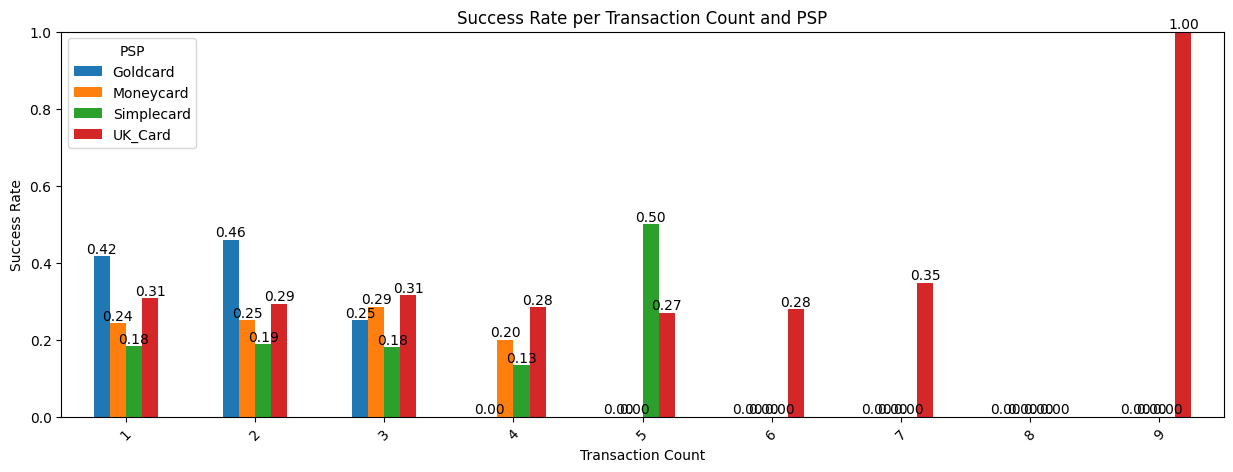

In [132]:
plot_combined_success_rate_distribution_reg("transaction_count", "Transaction Count", "bar", size=(15,5))